Health Insurance Lead Prediction 

Ploblem Statement : Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

1) Demographics (city, age, region etc.)
2) Information regarding holding policies of the customer
3) Recommended Policy Information

Importing Libraries

In [292]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Data Inspection

In [293]:
train=pd.read_csv("train_Df64byy.csv")
test=pd.read_csv("test_YCcRUnU.csv")

In [294]:
train.shape,test.shape

((50882, 14), (21805, 13))

In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


In [296]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [297]:
#identifying missing values
train.isnull().sum()/train.shape[0] * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [298]:
test.isnull().sum()/test.shape[0] * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [299]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [300]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [301]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [302]:
test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


In [303]:
#to identify columns as categorical & numerical in train data set
train_numCols = train.select_dtypes("number").columns
print("The train data numerical variables are :")
train_numCols= print(list(set(train_numCols)))
print("**************************************************")
train_catCols = train.select_dtypes("object").columns
print("The train data categorical variables are :")
train_catCols= print(list(set(train_catCols)))


The train data numerical variables are :
['Holding_Policy_Type', 'Reco_Policy_Premium', 'Response', 'Lower_Age', 'ID', 'Region_Code', 'Reco_Policy_Cat', 'Upper_Age']
**************************************************
The train data categorical variables are :
['Holding_Policy_Duration', 'Reco_Insurance_Type', 'City_Code', 'Health Indicator', 'Accomodation_Type', 'Is_Spouse']


In [304]:
#to identify columns as categorical & numerical in test data set
test_numCols = test.select_dtypes("number").columns
print("The test data numerical variables are :")
test_numCols= print(list(set(test_numCols)))
print("**************************************************")
test_catCols = test.select_dtypes("object").columns
print("The test data categorical variables are :")
test_catCols= print(list(set(test_catCols)))


The test data numerical variables are :
['Holding_Policy_Type', 'Reco_Policy_Premium', 'Lower_Age', 'ID', 'Region_Code', 'Reco_Policy_Cat', 'Upper_Age']
**************************************************
The test data categorical variables are :
['Holding_Policy_Duration', 'Reco_Insurance_Type', 'City_Code', 'Health Indicator', 'Accomodation_Type', 'Is_Spouse']


In [305]:
#missing value treatment for  'Holding_Policy_Type'
train['Holding_Policy_Type']= train['Holding_Policy_Type'].replace(' ',np.nan).astype(float)
train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].median())



In [306]:
test['Holding_Policy_Type']= test['Holding_Policy_Type'].replace(' ',np.nan).astype(float)
test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].median())



In [307]:
train['Holding_Policy_Type'].isnull().sum(),test['Holding_Policy_Type'].isnull().sum()

(0, 0)

In [308]:
#missing value treatment for categorical variable 'Health Indicator'
train['Health Indicator']= train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
test['Health Indicator']= test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

In [309]:
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(0, 0)

In [310]:
#missing value treatment for categorical variable 'Holding_Policy_Duration'
train['Holding_Policy_Duration']= train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])
test['Holding_Policy_Duration']= test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])

In [311]:
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(0, 0)

In [312]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [313]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

Exploratory Data Analysis

In [314]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [315]:
train.tail(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,50878,C4,845,Rented,Individual,22,22,No,X3,1.0,3.0,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [316]:
#plt.figure(figsize=(10,15))
#sns.countplot('Reco_Policy_Premium',data=train,palette='ocean')

Label encoding performed for the required columns contating categorical features

In [317]:
# Labelencoding
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [331]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [332]:
train.dtypes

ID                           int64
City_Code                    int64
Region_Code                  int64
Accomodation_Type            int64
Reco_Insurance_Type          int64
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int64
Health Indicator             int64
Holding_Policy_Duration      int64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [334]:
# Seperate Features and Target
x= train.drop(columns = ['Response'], axis=1)
y= train['Response']


In [335]:
x.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,22,3213,1,0,36,36,0,0,5,3.0,22,11628.0
1,2,31,1117,0,1,75,22,0,1,0,3.0,22,30510.0
2,3,31,3732,0,0,32,32,0,0,0,1.0,19,7450.0
3,4,16,4378,0,1,52,48,0,0,5,3.0,19,17780.0
4,5,34,2190,1,0,44,44,0,1,8,1.0,16,10404.0


In [336]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [337]:
# 20% data as validation set
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=22)

In [338]:
#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [339]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#svm
model3 = SVC(gamma=100,kernel='linear',C=10)
#RF
model4 = RandomForestClassifier(random_state = 1,max_depth = 15,n_estimators = 500,min_samples_split = 2,min_samples_leaf = 1)
#NAiveBayes
model5 = GaussianNB()

In [340]:
model1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [341]:
model2.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [342]:
#model3.fit(x_train, y_train)


In [353]:
model4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [354]:
model5.fit(x_train, y_train)

GaussianNB(priors=None)

In [355]:
# predict probabilities
pred_prob1 = model1.predict_proba(x_valid)
pred_prob2 = model2.predict_proba(x_valid)
pred_prob4 = model4.predict_proba(x_valid)
pred_prob5 = model5.predict_proba(x_valid)


In [356]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_valid, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_valid, pred_prob2[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_valid, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_valid, pred_prob5[:,1], pos_label=1)



# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

In [357]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_valid, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_valid, pred_prob2[:,1])
auc_score4 = roc_auc_score(y_valid, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_valid, pred_prob5[:,1])


print(auc_score1, auc_score2,auc_score4,auc_score5)

0.5048487997847262 0.5000785293999241 0.6441449644776961 0.5499437448750627


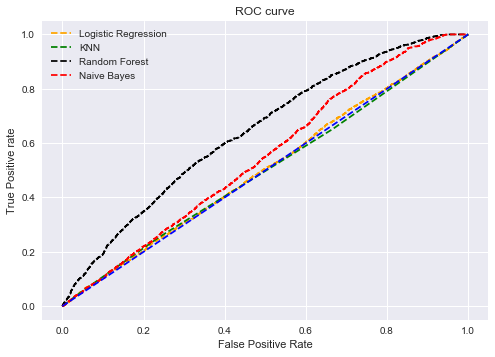

In [358]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Naive Bayes')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [359]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')
submission = submission.drop(columns = ['Response'], axis=1)
final_predictions = model1.predict(test)
submission['Response'] = final_predictions
#only positive predictions for the target variable
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)